## Imports and installations

In [1]:
!ls

10k_unfiltered.csv
20k_2008.csv
2k_general.csv
5k_2008.csv
Data collection
EMOROBERTA & EMOJI VIZ TESTS.ipynb
Ewan_2k_tweets-Copy.ipynb
Ewan_4_Top2Vec.ipynb
Ewan_first_twitter_top2vec.ipynb
Ewan_optimise_top2vec_20K.ipynb
Ewan_top2vec_test.ipynb
Ewan_ukraine_data_collection.ipynb
Humberto_RoBERTa.ipynb
Jenna_optimise_top2vec_20K.ipynb
Roberta_ukraine.csv
accessing_google_drive.ipynb
large_df_inc17 (1)
top2vec_test.ipynb
training.1600000.processed.noemoticon.csv
ukraine_2k_tweets.csv


In [2]:
# from psutil import virtual_memory
# ram_gb = virtual_memory().total / 1e9
# print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

# if ram_gb < 20:
#   print('Not using a high-RAM runtime')
# else:
#   print('You are using a high-RAM runtime!')

In [3]:
# import os
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from top2vec import Top2Vec

/Users/ewanevans/.pyenv/versions/3.8.12/envs/nlp_sentiment/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Read data

In [1]:
df = pd.read_csv('large_df_inc17 (1)')

NameError: name 'pd' is not defined

In [ ]:
df.sort_values(by=['Datetime'],inplace=True)

In [ ]:
df.reset_index()


index  Unnamed: 0                  Unnamed: 0.1  \
0        1056558     1786720                   ‚ÄúA lovely   
1        1111762     1914382           The 'homeless hero'   
2          13269       13793                         13774   
3          13268       13792                         13773   
4          13267       13791                         13772   
...          ...         ...                           ...   
1337415   180355      270139                             3   
1337416   180354      270138                             2   
1337417   180353      270137                             1   
1337418   180352      270136                             0   
1337419     6974        7038  .. http://tinyurl.com/cns7o7   

                           Datetime  \
0                              warm   
1         who was donated over ¬£52   
2         2008-07-28 07:20:28+00:00   
3         2008-07-28 07:50:03+00:00   
4         2008-07-28 07:50:05+00:00   
...                             ...   
1337415   2022-06-09 23:45:09+00:00   
1337416   2022-06-09 23:49:21+00:00   
1337417   2022-06-09 23:50:00+00:00   
1337418   2022-06-09 23:56:58+00:00   
1337419                         NaN   

                                                Tweet Id  \
0                                                   kind   
1        000 for helping Manchester Arena terror victims   
2                                            870335870.0   
3                                            870349691.0   
4                                            870349721.0   
...                                                  ...   
1337415                            1535045367053549568.0   
1337416                            1535046424026660864.0   
1337417                            1535046584559357952.0   
1337418                            1535048339720380416.0   
1337419                                              NaN   

                                                      Text  \
0                                                sensitive   
1                         admits he stole from the wounded   
2        The end of the pier show: Weston-Super-Mare lo...   
3        The end of the pier show: Weston-super-Mare lo...   
4        Neighbours from hell: The £65m &#039;Bitch fro...   
...                                                    ...   
1337415  Friends of ex-Qatari royal dead of OD say 'no ...   
1337416  EXCLUSIVE: Britney Spears' big brother seen ru...   
1337417  Ooh, today's Wordle puzzle is a tricky one, wh...   
1337418  Molly-Mae Hague's dad discusses her 'unfair an...   
1337419                                                NaN   

                                              Unnamed: 4  \
0         generous soul with a touch of naughty! RIP.‚Äù   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
1337415                                              NaN   
1337416                                              NaN   
1337417                                              NaN   
1337418                                              NaN   
1337419                                              NaN   

                                              preprocessed  
0                                                sensitive  
1                                     admits stole wounded  
2        end pier show weston super mare loses attracti...  
3        end pier show weston super mare loses attracti...  
4        neighbour hell £65m 039 bitch budapest 039 uns...  
...                                                    ...  
1337415   friend ex qatari royal dead od say way used drug  
1337416  exclusive britney spear big brother seen runni...  
1337417  ooh today wordle puzzle tricky one put togethe...  


In [ ]:
df.head()

Unnamed: 0         Unnamed: 0.1                    Datetime  \
1056558     1786720          ‚ÄúA lovely                        warm   
1111762     1914382  The 'homeless hero'   who was donated over ¬£52   
13269         13793                13774   2008-07-28 07:20:28+00:00   
13268         13792                13773   2008-07-28 07:50:03+00:00   
13267         13791                13772   2008-07-28 07:50:05+00:00   

                                                Tweet Id  \
1056558                                             kind   
1111762  000 for helping Manchester Arena terror victims   
13269                                        870335870.0   
13268                                        870349691.0   
13267                                        870349721.0   

                                                      Text  \
1056558                                          sensitive   
1111762                   admits he stole from the wounded   
13269    The end of the pier show: Weston-Super-Mare lo...   
13268    The end of the pier show: Weston-super-Mare lo...   
13267    Neighbours from hell: The £65m &#039;Bitch fro...   

                                              Unnamed: 4  \
1056558   generous soul with a touch of naughty! RIP.‚Äù   
1111762                                              NaN   
13269                                                NaN   
13268                                                NaN   
13267                                                NaN   

                                              preprocessed  
1056558                                          sensitive  
1111762                               admits stole wounded  
13269    end pier show weston super mare loses attracti...  
13268    end pier show weston super mare loses attracti...  
13267    neighbour hell £65m 039 bitch budapest 039 uns...

In [ ]:
df.tail(5)

Unnamed: 0                  Unnamed: 0.1                   Datetime  \
180355      270139                             3  2022-06-09 23:45:09+00:00   
180354      270138                             2  2022-06-09 23:49:21+00:00   
180353      270137                             1  2022-06-09 23:50:00+00:00   
180352      270136                             0  2022-06-09 23:56:58+00:00   
6974          7038  .. http://tinyurl.com/cns7o7                        NaN   

                     Tweet Id  \
180355  1535045367053549568.0   
180354  1535046424026660864.0   
180353  1535046584559357952.0   
180352  1535048339720380416.0   
6974                      NaN   

                                                     Text Unnamed: 4  \
180355  Friends of ex-Qatari royal dead of OD say 'no ...        NaN   
180354  EXCLUSIVE: Britney Spears' big brother seen ru...        NaN   
180353  Ooh, today's Wordle puzzle is a tricky one, wh...        NaN   
180352  Molly-Mae Hague's dad discusses her 'unfair an...        NaN   
6974                                                  NaN        NaN   

                                             preprocessed  
180355   friend ex qatari royal dead od say way used drug  
180354  exclusive britney spear big brother seen runni...  
180353  ooh today wordle puzzle tricky one put togethe...  
180352  molly mae hague dad discus unfair prominent st...  
6974                                                 none



```
# This is formatted as code
```


# Analysis
```

```



In [ ]:
start, step, stop = 802452, 26748, 829200
for i in range(10):
  print(start, stop)
  start += step
  stop += step


802452 829200
829200 855948
855948 882696
882696 909444
909444 936192
936192 962940
962940 989688
989688 1016436
1016436 1043184
1043184 1069932


In [ ]:
df_final = pd.DataFrame(df.iloc[802452:1069936,])

In [ ]:
df_1 = pd.DataFrame(df.iloc[802452:829200,])

In [ ]:
df_2 = pd.DataFrame(df.iloc[829200:855948,])

In [ ]:
df_3 = pd.DataFrame(df.iloc[855948:882696,])

In [ ]:
df_4 = pd.DataFrame(df.iloc[882696:909444,])

In [ ]:
df_5 = pd.DataFrame(df.iloc[909444:936192,])

In [ ]:
df_6 = pd.DataFrame(df.iloc[936192:962940,])

In [ ]:
df_7 = pd.DataFrame(df.iloc[962940:989688,])

In [ ]:
df_8 = pd.DataFrame(df.iloc[989688:1016436,])

In [ ]:
df_9 = pd.DataFrame(df.iloc[1016436:1043184,])

In [ ]:
df_10 = pd.DataFrame(df.iloc[1043184:1069932,])

In [ ]:
# index df from 2018 - December 2020 
list_tweets_1 = [str(i) for i in df_1['preprocessed']]

In [ ]:
# index df from 2018 - December 2020 
list_tweets_2 = [str(i) for i in df_2['preprocessed']]

In [ ]:
# index df from 2018 - December 2020 
list_tweets_3 = [str(i) for i in df_3['preprocessed']]

In [ ]:
# index df from 2018 - December 2020 
list_tweets_4 = [str(i) for i in df_4['preprocessed']]

In [ ]:
# index df from 2018 - December 2020 
list_tweets_5 = [str(i) for i in df_5['preprocessed']]

In [ ]:
# index df from 2018 - December 2020 
list_tweets_6 = [str(i) for i in df_6['preprocessed']]

In [ ]:
# index df from 2018 - December 2020 
list_tweets_7 = [str(i) for i in df_7['preprocessed']]

In [ ]:
# index df from 2018 - December 2020 
list_tweets_8 = [str(i) for i in df_8['preprocessed']]

In [ ]:
# index df from 2018 - December 2020 
list_tweets_9 = [str(i) for i in df_9['preprocessed']]

In [ ]:
# index df from 2018 - December 2020 
list_tweets_10 = [str(i) for i in df_10['preprocessed']]

In [ ]:
# index df from 2018 - December 2020 
list_tweets_final = [str(i) for i in df_final['preprocessed']]

In [ ]:
%%time 
model_1 = Top2Vec(list_tweets_1, workers=-1, speed='fast-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-13 13:40:41,586 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-13 13:40:43,844 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-06-13 13:40:51,439 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-13 13:40:54,647 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-06-13 13:41:49,111 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-06-13 13:41:50,703 - top2v

CPU times: user 1min 9s, sys: 2.73 s, total: 1min 12s
Wall time: 1min 9s


In [ ]:
%%time 
model_2 = Top2Vec(list_tweets_2, workers=-1, speed='fast-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-13 13:42:08,001 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-13 13:42:09,065 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-06-13 13:42:13,097 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-13 13:42:14,805 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-06-13 13:42:43,908 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-06-13 13:42:44,960 - top2v

CPU times: user 1min, sys: 1.62 s, total: 1min 1s
Wall time: 37.2 s


In [ ]:
%%time 
model_3 = Top2Vec(list_tweets_3, workers=-1, speed='fast-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-13 13:42:54,749 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-13 13:42:55,820 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-06-13 13:42:59,568 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-13 13:43:01,275 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-06-13 13:43:30,663 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-06-13 13:43:31,692 - top2v

CPU times: user 58.2 s, sys: 1.43 s, total: 59.6 s
Wall time: 37.3 s


In [ ]:
%%time 
model_4 = Top2Vec(list_tweets_4, workers=-1, speed='fast-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-13 13:43:34,313 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-13 13:43:35,394 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-06-13 13:43:39,428 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-13 13:43:41,103 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-06-13 13:44:10,314 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-06-13 13:44:11,326 - top2v

CPU times: user 1min, sys: 1.61 s, total: 1min 2s
Wall time: 37.3 s


In [ ]:
%%time 
model_5 = Top2Vec(list_tweets_5, workers=-1, speed='fast-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-13 13:44:14,076 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-13 13:44:15,146 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-06-13 13:44:18,744 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-13 13:44:20,482 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-06-13 13:44:49,576 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-06-13 13:44:50,565 - top2v

CPU times: user 60 s, sys: 1.59 s, total: 1min 1s
Wall time: 36.8 s


In [ ]:
%%time 
model_6 = Top2Vec(list_tweets_6, workers=-1, speed='fast-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-13 13:44:54,054 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-13 13:44:55,142 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-06-13 13:44:59,328 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-13 13:45:01,063 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-06-13 13:45:29,715 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-06-13 13:45:30,740 - top2v

CPU times: user 1min, sys: 1.36 s, total: 1min 1s
Wall time: 37 s


In [ ]:
%%time 
model_7 = Top2Vec(list_tweets_7, workers=-1, speed='fast-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-13 13:45:51,131 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-13 13:45:52,281 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-06-13 13:45:55,944 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-13 13:45:57,748 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-06-13 13:46:27,269 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-06-13 13:46:28,403 - top2v

CPU times: user 1min 1s, sys: 1.6 s, total: 1min 2s
Wall time: 37.6 s


In [ ]:
%%time 
model_8 = Top2Vec(list_tweets_8, workers=-1, speed='fast-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-13 13:46:30,753 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-13 13:46:31,855 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-06-13 13:46:35,601 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-13 13:46:37,341 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-06-13 13:47:07,198 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-06-13 13:47:08,248 - top2v

CPU times: user 1min 1s, sys: 1.64 s, total: 1min 2s
Wall time: 37.8 s


In [ ]:
%%time 
model_9 = Top2Vec(list_tweets_9, workers=-1, speed='fast-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-13 13:47:11,038 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-13 13:47:12,160 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-06-13 13:47:16,089 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-13 13:47:17,791 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-06-13 13:47:47,248 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-06-13 13:47:48,302 - top2v

CPU times: user 1min, sys: 1.76 s, total: 1min 2s
Wall time: 37.6 s


In [ ]:
%%time 
model_10 = Top2Vec(list_tweets_10, workers=-1, speed='fast-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-13 13:47:59,671 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-13 13:48:00,801 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-06-13 13:48:05,813 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-13 13:48:08,295 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-06-13 13:48:42,979 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-06-13 13:48:45,312 - top2v

CPU times: user 1min 2s, sys: 1.38 s, total: 1min 3s
Wall time: 46.1 s


In [ ]:
new_list = list_tweets_1 + \
            list_tweets_2 + list_tweets_3 + \
            list_tweets_4 + list_tweets_5 + \
            list_tweets_6 + list_tweets_7 + \
            list_tweets_8 + list_tweets_9 + \
            list_tweets_10

len(new_list)

267480

In [ ]:
list_tweets_final = [str(i) for i in new_list if len(i) >=3]

In [ ]:
len(list_tweets_final)

267484

In [ ]:
pd.DataFrame(list_tweets_final)

0
0        revealed boris johnson humiliating divorce paper
1       kris boyson shockingly reveals katie price con...
2       novak djokovic wife jelena sends vote support ...
3       mi6 agent heart al qaeda knew bin laden wa pla...
4       kym marsh slam loose woman boss coleen nolan r...
...                                                   ...
267479  meghan markle ex husband blunt comment duchess...
267480  pictured 13th century church overlook 27 acre ...
267481  pound euro exchange rate volatile amid high ex...
267482  eu argument brexit threatens integrity single ...
267483  sweden seeing double number covid case per cap...

[267484 rows x 1 columns]

In [ ]:
%%time 
Top2Vec(list_tweets_final[0:150_000],
        workers=-1,
        speed='fast-learn',
        min_count=100,
        embedding_model='universal-sentence-encoder')

2022-06-13 15:07:11,311 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-13 15:07:33,421 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-06-13 15:07:41,634 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-13 15:07:56,641 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

In [ ]:
for i in range(10):
  list_{i} = [str(i) for i in df['preprocessed'][802452:1069936]]

In [ ]:
df.iloc[802452]

Unnamed: 0                                                1340137
Unnamed: 0.1                                               217053
Datetime                                2018-09-10 06:16:10+00:00
Tweet Id                                    1039034777976877056.0
Text            Revealed: Boris Johnson's humiliating divorce ...
Unnamed: 4                                                    NaN
preprocessed     revealed boris johnson humiliating divorce paper
Name: 810026, dtype: object

In [ ]:
df.iloc[1069936]

Unnamed: 0                                                 920430
Unnamed: 0.1                                               252406
Datetime                                2020-12-07 15:31:17+00:00
Tweet Id                                      1335970139611799552
Text            Andrew Neil picks apart Scottish independence ...
Unnamed: 4                                                    NaN
preprocessed    andrew neil pick apart scottish independence c...
Name: 512184, dtype: object

In [ ]:
%%time 
model_5 = Top2Vec(list_tweets_2, workers=-1, speed='fast-learn', min_count=100, embedding_model='universal-sentence-encoder')

2022-06-13 11:29:50,658 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-13 11:30:00,905 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-06-13 11:30:18,076 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-13 11:30:38,932 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

In [ ]:
# The number of topics Top2Vec has found
model_5.get_num_topics()

1388

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["migrant"], num_topics=5)
topic_nums

array([ 18, 619, 283, 557, 419])

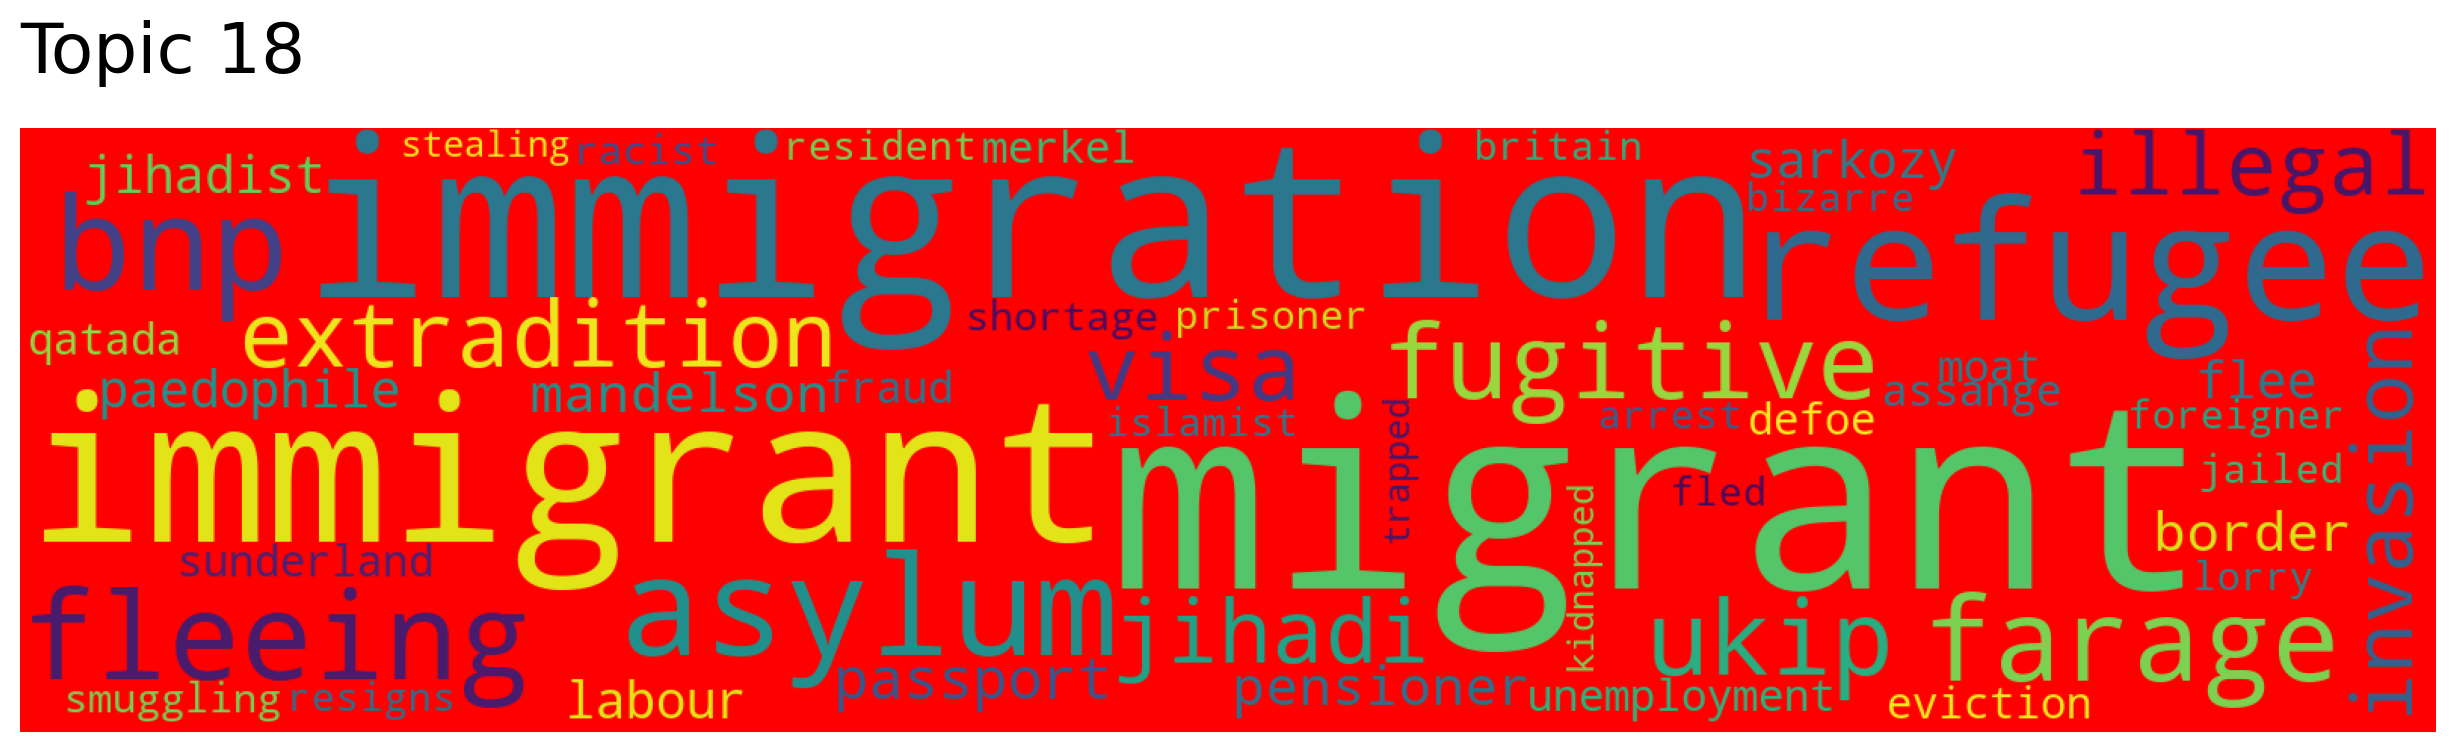

In [ ]:
model_5.generate_topic_wordcloud(topic_num=18, background_color='red')

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["refugee"], num_topics=5)
topic_nums

array([619,  18, 283, 945, 557])

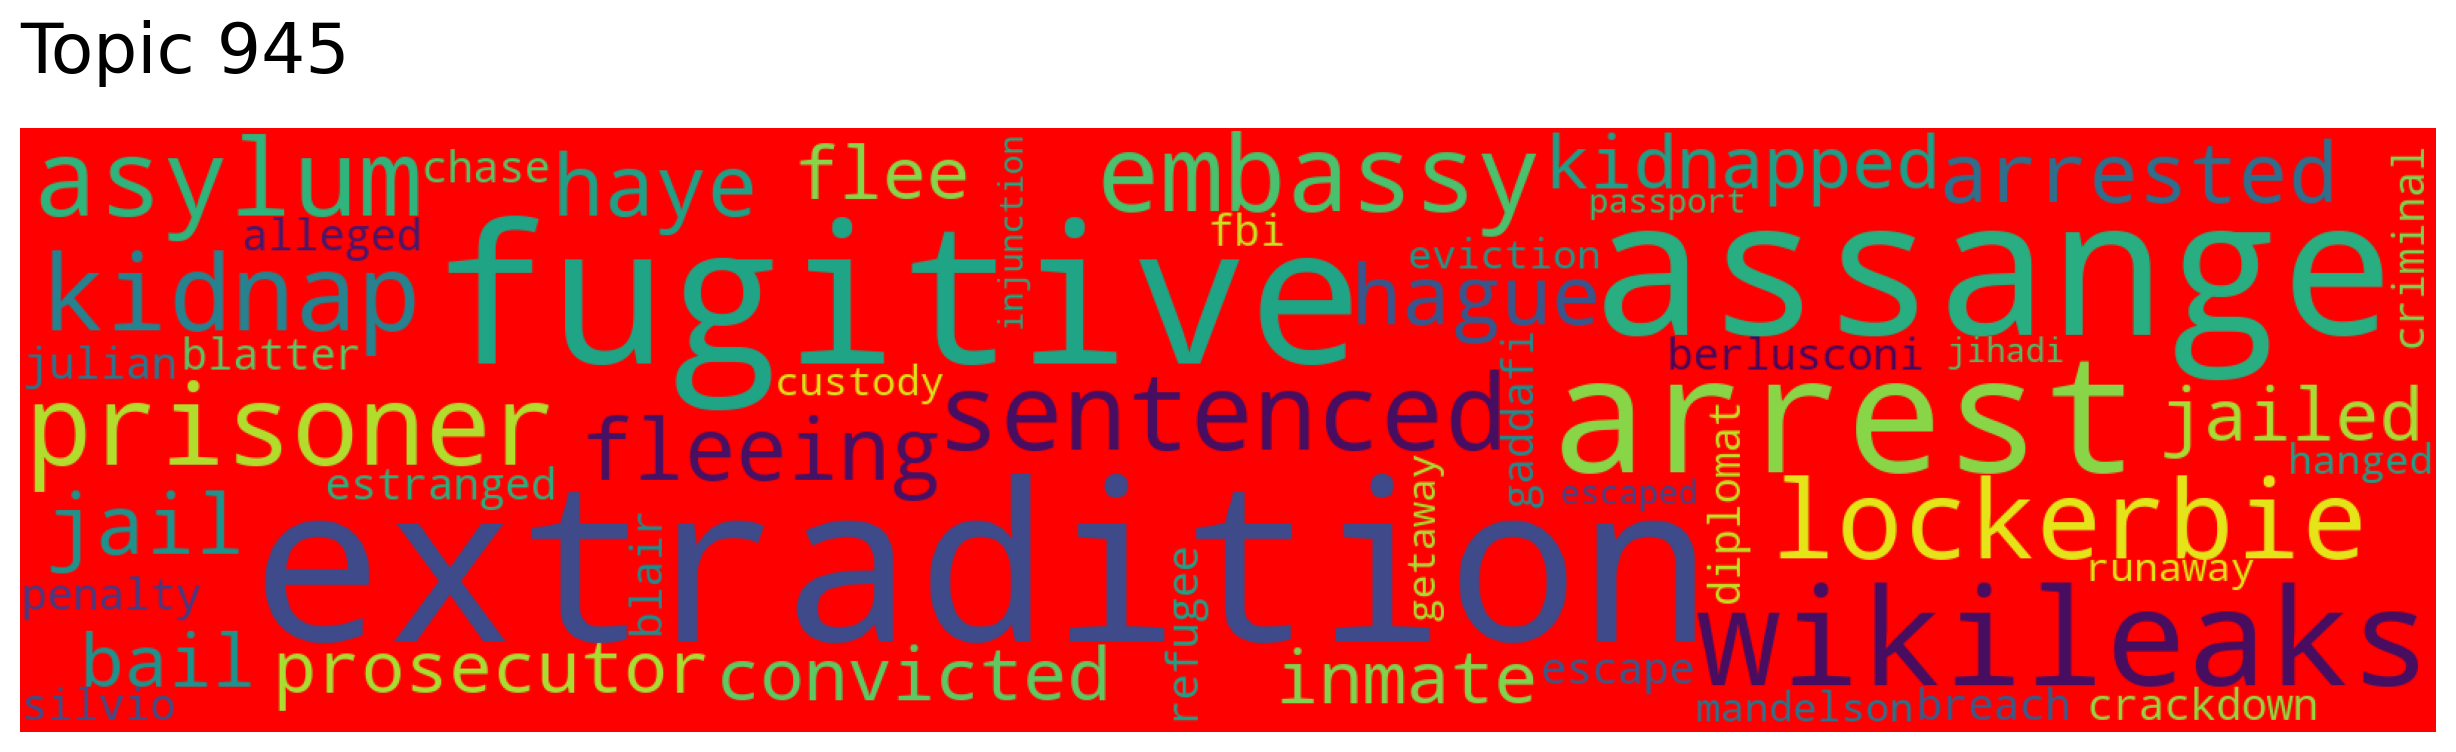

In [ ]:
model_5.generate_topic_wordcloud(topic_num=945, background_color='red')

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["asylum"], num_topics=5)
topic_nums

array([619,  18, 945, 283, 866])

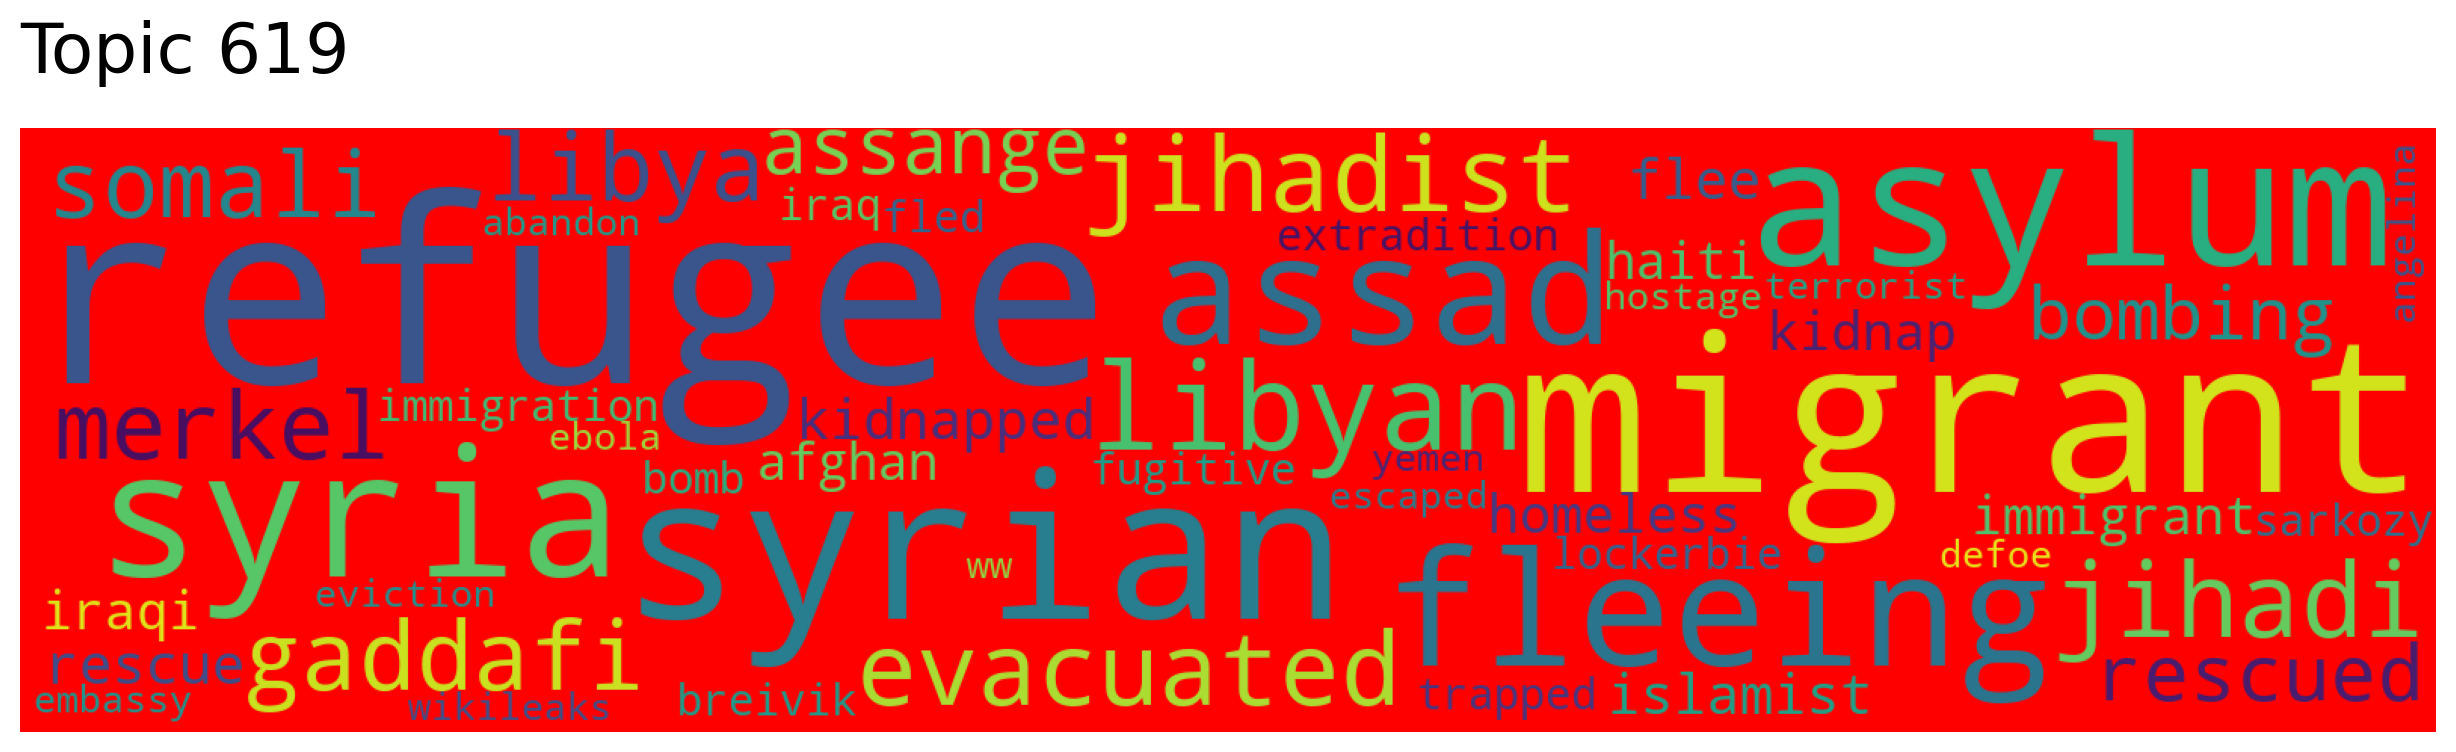

In [ ]:
model_5.generate_topic_wordcloud(topic_num=619, background_color='red')

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["muslim"], num_topics=5)
topic_nums

array([  60,  283,  300, 1166,  780])

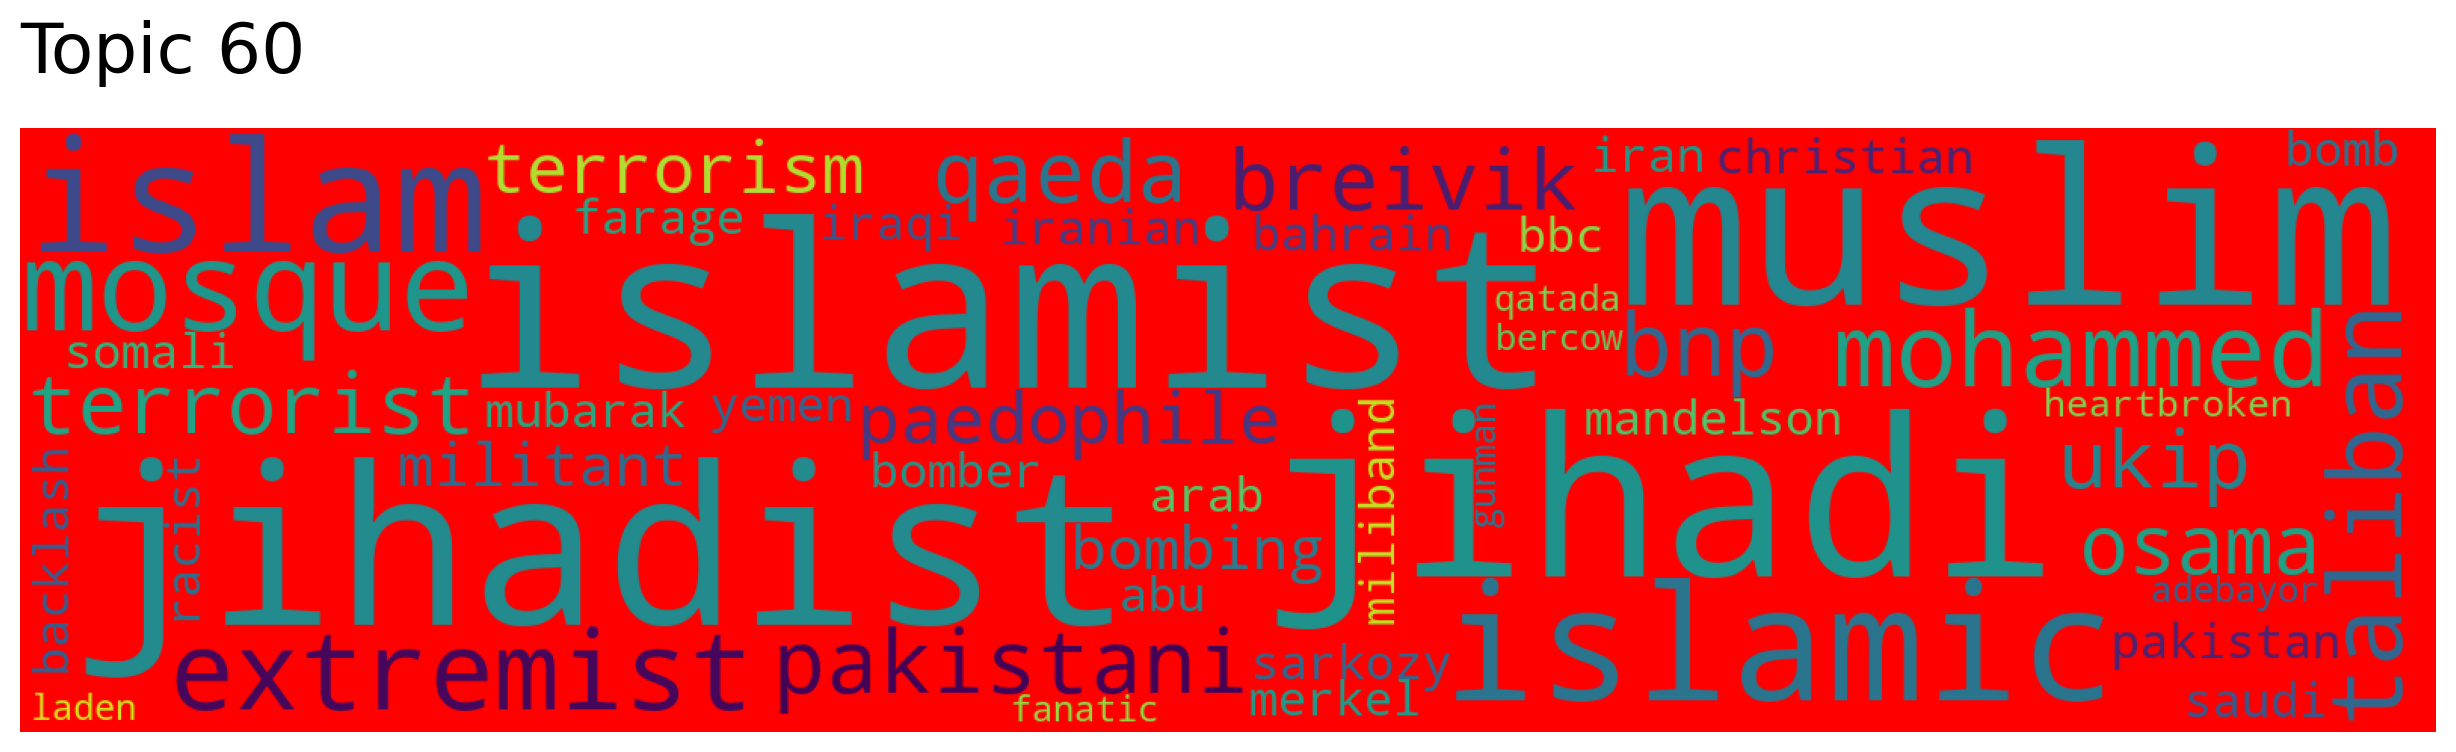

In [ ]:
model_5.generate_topic_wordcloud(topic_num=60, background_color='red')

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["polish"], num_topics=5)
topic_nums

array([ 283,  557,  861, 1100,  668])

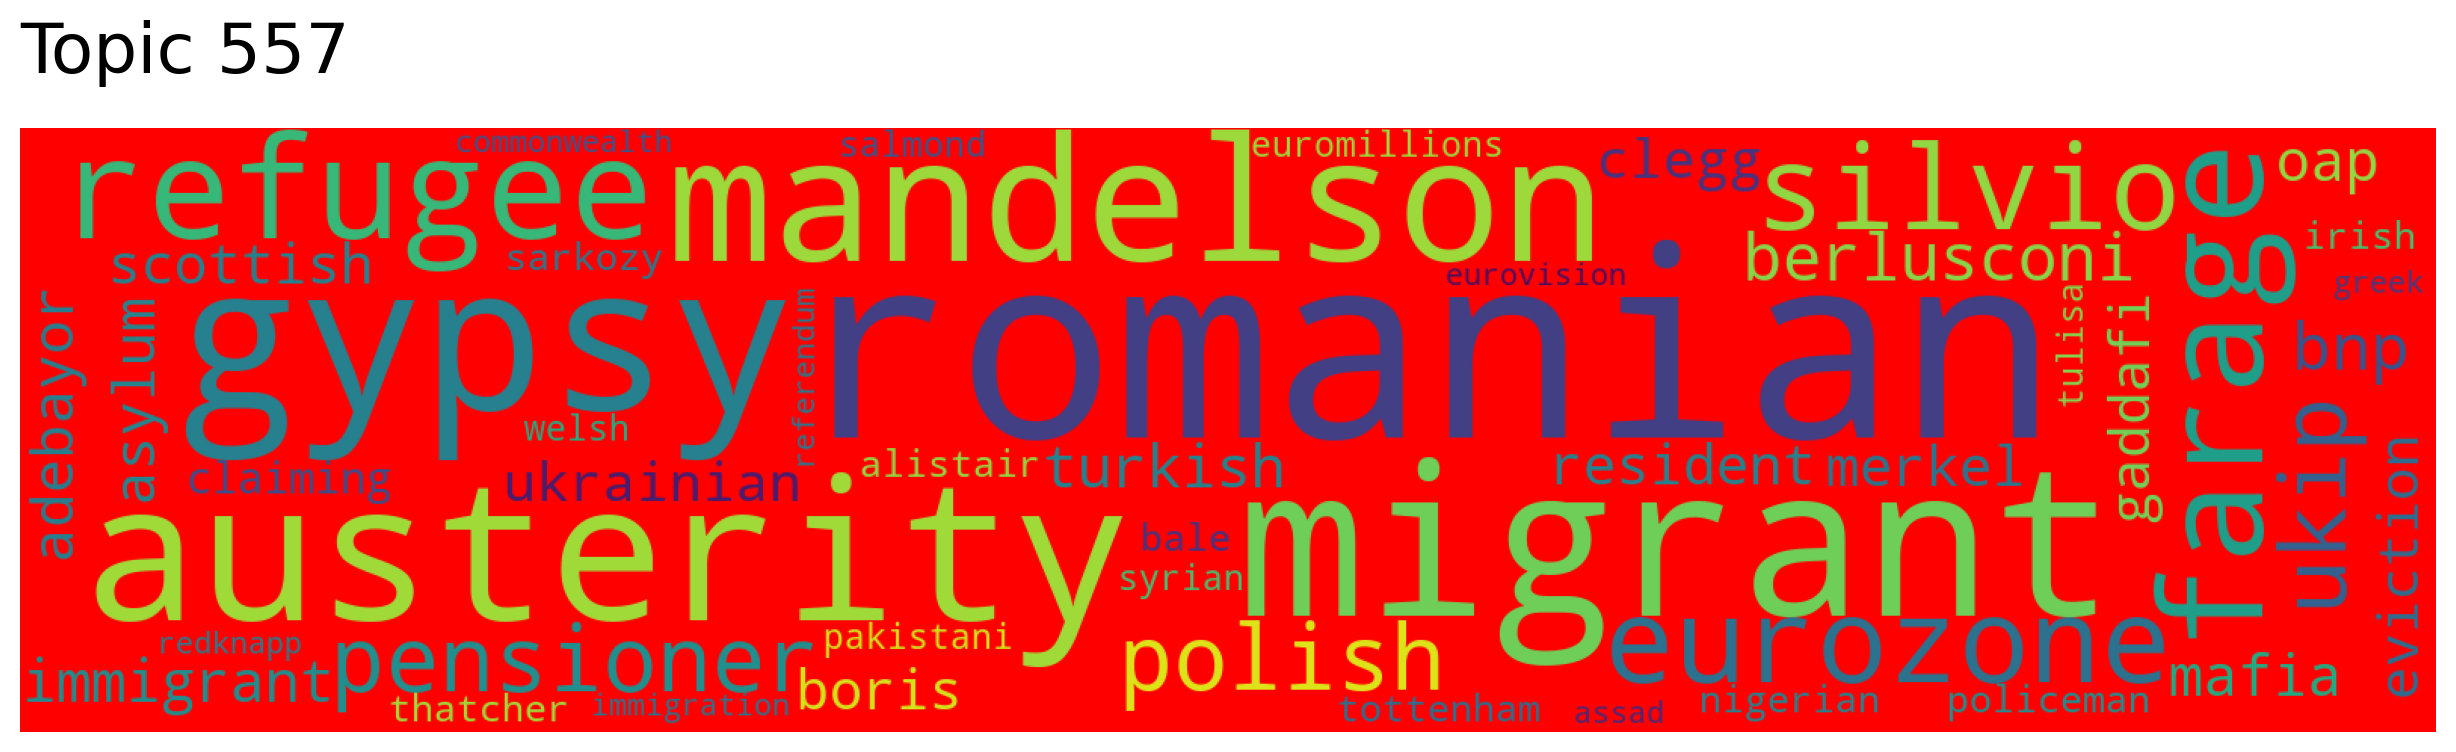

In [ ]:
model_5.generate_topic_wordcloud(topic_num=557, background_color='red')

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5.search_topics(keywords=["syria"], num_topics=5)
topic_nums

array([  76,  957,  237, 1195,  332])

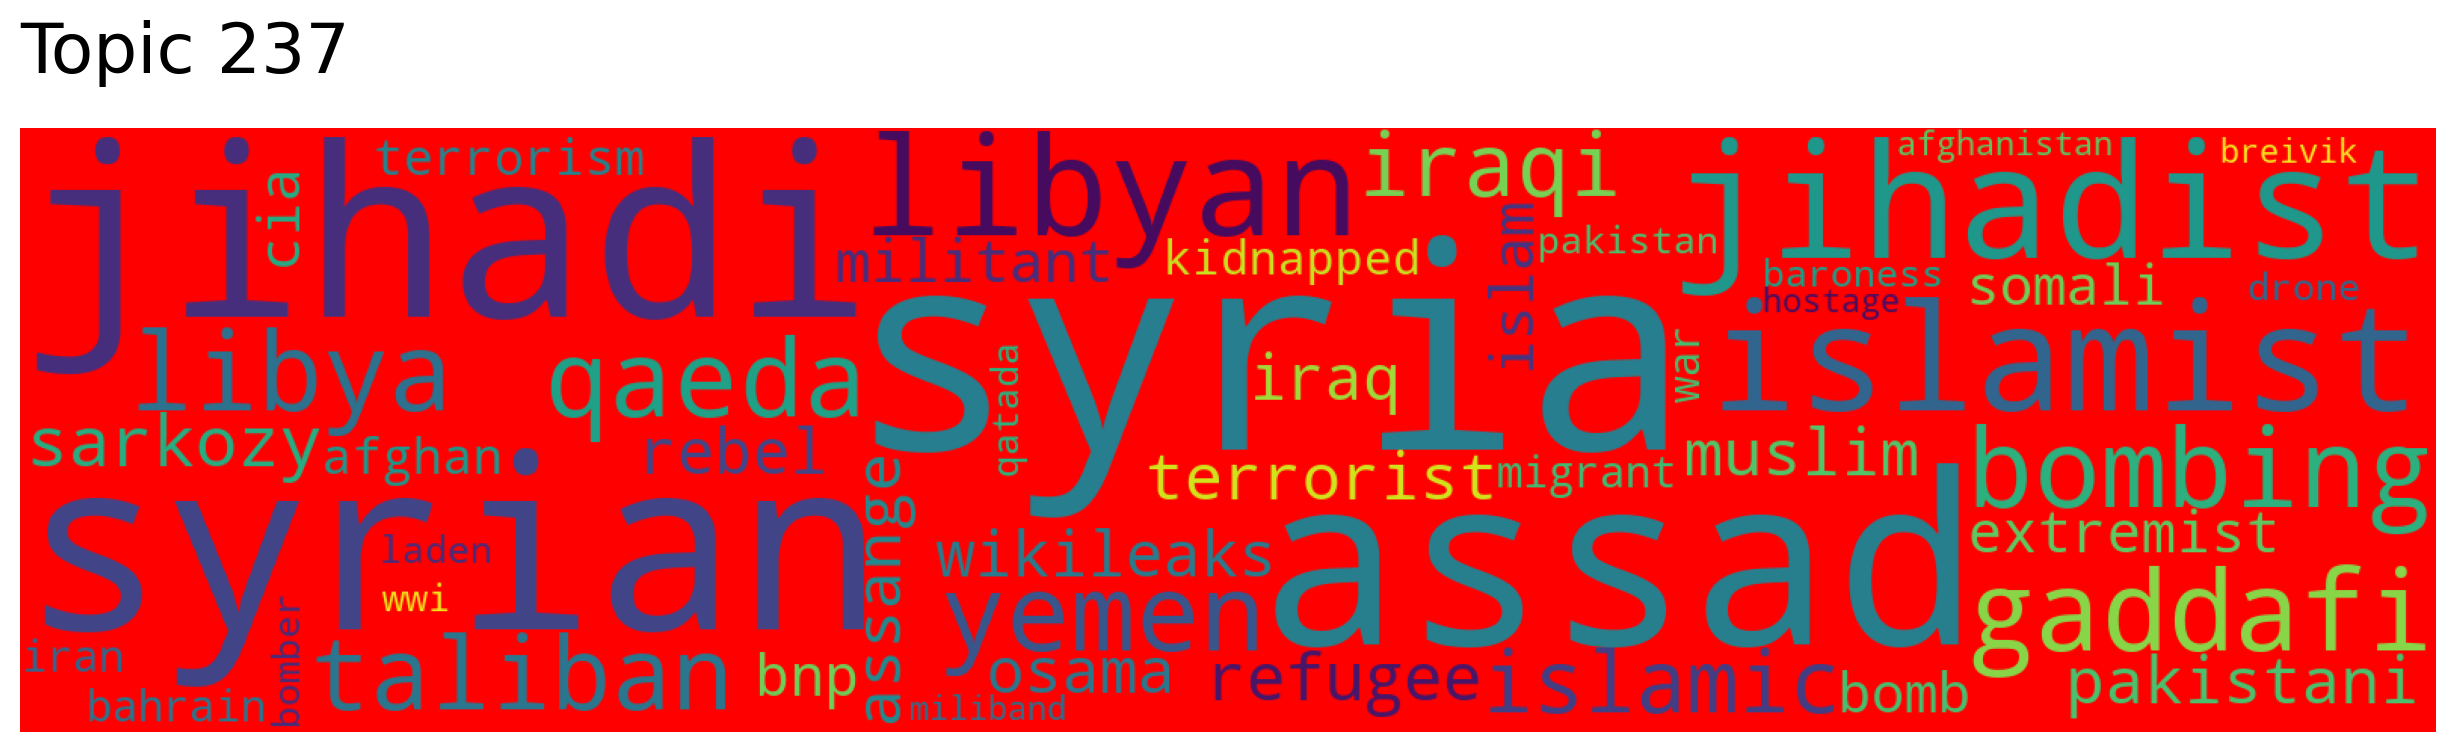

In [ ]:
model_5.generate_topic_wordcloud(topic_num=237, background_color='red')